Day 09 - Part 1: Finding peaks

In [100]:
import pandas as pd
data = pd.read_csv('test_data.csv', header=None)

def find_sum_peaks(data:pd.DataFrame):
    from findpeaks import findpeaks
    import numpy as np

    numbers = [str(no[0]) for no in data.values.tolist()]
    original_array = []
    for idx in range(len(numbers)):
        original_array.append([int(i) for i in numbers[idx]])

    # 100 is added to transpose vals
    transposed = np.array(original_array) + 100
    for val, rep in zip(range(10), range(9,-1,-1)):
        transposed = np.where(transposed == val + 100, rep, transposed)

    # Find peaks and cby mask method
    fp = findpeaks(method='mask')
    peaks = fp.fit(transposed)
    values = np.array(original_array)[peaks['Xdetect']] + 1
    return sum(values)

find_sum_peaks(data)

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.


15

In [99]:
data = pd.read_csv('input_data.csv', header=None)
find_sum_peaks(data)

[findpeaks] >Finding peaks in 2d-array using mask method..
[findpeaks] >Scaling image between [0-255] and to uint8
[findpeaks] >Conversion to gray image.
[findpeaks] >WARNING: Conversion to gray not possible.
[findpeaks] >Denoising with [fastnl], window: [3].
[findpeaks] >Detect peaks using the mask method with limit=0.
[findpeaks] >Fin.


468

Part 2: Find largest basin

In [163]:
import pandas as pd
import numpy as np
import cv2 as cv
data = pd.read_csv('input_data.csv', header=None)
numbers = [str(no[0]) for no in data.values.tolist()]
original_array = []
for idx in range(len(numbers)):
    original_array.append([int(i) for i in numbers[idx]])
original_array = np.array(original_array)

# Turn image to binary black and while. As 9's are while and non-9's are 0
img = np.where(original_array == 9, 255, original_array)
img = np.where(img != 255,0,img)
img = img.astype('uint8')

# Find contours
contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours

(array([[[92, 98]]], dtype=int32),
 array([[[86, 97]]], dtype=int32),
 array([[[ 0, 90]]], dtype=int32),
 array([[[ 2, 24]]], dtype=int32),
 array([[[99, 22]],
 
        [[98, 23]],
 
        [[99, 24]]], dtype=int32),
 array([[[ 0, 18]]], dtype=int32),
 array([[[90, 11]]], dtype=int32),
 array([[[5, 4]]], dtype=int32),
 array([[[45,  0]]], dtype=int32),
 array([[[25,  0]]], dtype=int32),
 array([[[ 9,  0]],
 
        [[ 8,  1]],
 
        [[10,  3]],
 
        ...,
 
        [[10,  4]],
 
        [[10,  3]],
 
        [[ 8,  1]]], dtype=int32),
 array([[[15, 94]],
 
        [[17, 96]],
 
        [[14, 99]],
 
        [[13, 99]],
 
        [[12, 98]],
 
        [[12, 97]]], dtype=int32),
 array([[[ 2, 92]],
 
        [[ 3, 93]],
 
        [[ 3, 95]],
 
        [[ 2, 96]],
 
        [[ 0, 94]]], dtype=int32),
 array([[[64, 91]],
 
        [[65, 90]],
 
        [[66, 91]],
 
        [[67, 91]],
 
        [[68, 90]],
 
        [[69, 91]],
 
        [[69, 92]],
 
        [[70, 93]],
 
    

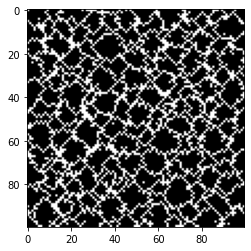

In [172]:
from matplotlib import pyplot as plt
area = cv.contourArea(contours[1])
plt.imshow(img)

dst = cv.copyMakeBorder(img, 1, 1, 1, 1, cv.BORDER_CONSTANT, None, 255)
plt.imshow(dst)

NewImage = np.uint8(np.empty(shape=(img.shape[0], img.shape[1], 3)))
for idx in range(3):
    NewImage[:, :, idx] = img
plt.imshow(NewImage)

In [169]:
NewImage = np.array(0)
NewImage

array(0)

array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
       [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
       [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
       [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
       [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]])

In [144]:
img = cv.imread('Eagle_coins.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
(thresh, blackAndWhiteImage) = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(blackAndWhiteImage, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [145]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [254, 254, 254, ..., 228, 228, 228],
       [253, 253, 253, ..., 225, 225, 225],
       [254, 254, 254, ..., 223, 223, 223]], dtype=uint8)